<a href="https://colab.research.google.com/github/harishmuh/Deep-Learning_study/blob/main/Evaluasi_tambah_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___
# **Experimental Analysis of Batch Size and Network Architecture on Fashion-MNIST Classification**

---

## **Context**

We conduct several experiments using the Fashion-MNIST dataset to analyze the effect of:

* Batch size

* Network depth

* Number of neurons

All experiments use:

* Epochs = 100

* Activation = ReLU (hidden layers)

* Output activation = Softmax

* Loss = Sparse Categorical Crossentropy

* Metric = Accuracy

* Optimizer = SGD

In [1]:
# Importing libraries
import tensorflow as tf
from tensorflow import keras
import datetime
import pandas as pd

In [2]:
# Loading dataset
fashion = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion.load_data()

In [3]:
# Normalize pixel values
X_train, X_test = X_train / 255.0, X_test / 255.0

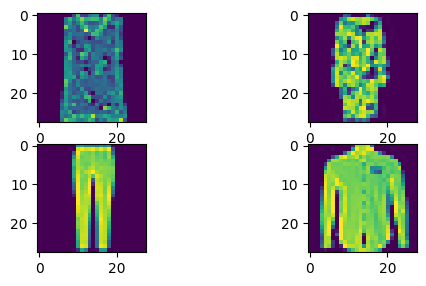

In [4]:
# Let's look at MNIST data

import matplotlib.pyplot as plt
import numpy as np

i= np.random.randint(0, len(X_train)-5)
plt.subplot(3,2,1)
plt.imshow(X_train[i])
plt.subplot(3,2,2)
plt.imshow(X_train[i+1])
plt.subplot(3,2,3)
plt.imshow(X_train[i+2])
plt.subplot(3,2,4)
plt.imshow(X_train[i+3])
plt.show()

**Defining TensorBoard**

In [5]:
# ==============================
# TensorBoard Callback
# ==============================
def get_tensorboard_callback(experiment_name):
    log_dir = "logs/fit/" + experiment_name + "_" + \
              datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    return tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

**Defining model builder function**

In [6]:
# ==============================
# Model Builder Function
# ==============================
def build_model(hidden_layers=[100]):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28]))

    for neurons in hidden_layers:
        model.add(keras.layers.Dense(neurons, activation='relu'))

    model.add(keras.layers.Dense(10, activation='softmax'))

    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer='SGD',
        metrics=['accuracy']
    )
    return model


**Defining experiment runner**

In [7]:
# ==============================
# Experiment Runner
# ==============================
results = []

def run_experiment(hidden_layers, batch_size, experiment_name):
    model = build_model(hidden_layers)

    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=batch_size,
        validation_data=(X_test, y_test),
        verbose=0
    )

    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    best_val_acc = max(history.history['val_accuracy'])

    results.append({
        "Experiment": experiment_name,
        "Hidden_Layers": str(hidden_layers),
        "Batch_Size": batch_size,
        "Final_Train_Acc": final_train_acc,
        "Final_Val_Acc": final_val_acc,
        "Best_Val_Acc": best_val_acc
    })

## **Experimental study**

We have four exeriments with configurations as below

🔹 **Experiment Group 1**

* Architecture: 1 hidden layer, 100 neurons
* Epochs: 100

Batch size variations:

* Batch = 32

* Batch = 128

* Batch = 60,000 (Full batch / Batch Gradient Descent)

* Batch = 512

🔹 **Experiment Group 2**

* Architecture: 2 hidden layers, 100 neurons each
* Epochs: 100

* Batch = 128

🔹 **Experiment Group 3**

* Architecture: 1 hidden layer, 200 neurons
* Epochs: 100

* Batch = 128

🔹 **Experiment Group 4**

* Architecture: 1 hidden layer, 50 neurons
* Epochs: 100

* Batch = 128

In [8]:
# ==============================
# EXPERIMENT GROUP 1
# 1 Hidden Layer (100 neurons)
# ==============================
for batch in [32, 128, 60000, 512]:
    run_experiment(
        hidden_layers=[100],
        batch_size=batch,
        experiment_name=f"1HL_100neurons_batch{batch}"
    )

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# ==============================
# EXPERIMENT GROUP 2
# 2 Hidden Layers (100 neurons each)
# ==============================
run_experiment(
    hidden_layers=[100, 100],
    batch_size=128,
    experiment_name="2HL_100neurons_batch128"
)

In [10]:
# ==============================
# EXPERIMENT GROUP 3
# 1 Hidden Layer (200 neurons)
# ==============================
run_experiment(
    hidden_layers=[200],
    batch_size=128,
    experiment_name="1HL_200neurons_batch128"
)


In [11]:
# ==============================
# EXPERIMENT GROUP 4
# 1 Hidden Layer (50 neurons)
# ==============================
run_experiment(
    hidden_layers=[50],
    batch_size=128,
    experiment_name="1HL_50neurons_batch128"
)

In [13]:
# ==============================
# Create Comparison DataFrame
# ==============================
results_df = pd.DataFrame(results)

# Sort by Best Validation Accuracy
results_df = results_df.sort_values(by="Best_Val_Acc", ascending=False)

results_df

,Experiment,Hidden_Layers,Batch_Size,Final_Train_Acc,Final_Val_Acc,Best_Val_Acc
0,1HL_100neurons_batch32,[100],32,0.937317,0.8835,0.8862
4,2HL_100neurons_batch128,"[100, 100]",128,0.911400,0.8785,0.8793
5,1HL_200neurons_batch128,[200],128,0.899417,0.8720,0.8727
1,1HL_100neurons_batch128,[100],128,0.893750,0.8701,0.8706
6,1HL_50neurons_batch128,[50],128,0.890800,0.8693,0.8693
3,1HL_100neurons_batch512,[100],512,0.866733,0.8490,0.8502
2,1HL_100neurons_batch60000,[100],60000,0.648650,0.6406,0.6410


We can see that the 100 neurons batch 32 treatment gives the best performance. While full batch (batch 60000) performs very poorly. As batch size increases, validation accuracy decreases. Smaller batch sizes introduce stochastic noise in gradient updates, which helps generalization.



## **Conclusion**

The best configuration in this experiment is:

>1 Hidden Layer (100 neurons) with Batch Size = 32

This treatment achievest the highest validation accuracy (≈88.6%).